In [1]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import matplotlib.pyplot as plt
%matplotlib widget

In [49]:
valonDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')

Text(0.5, 1.0, 'Single Scan')

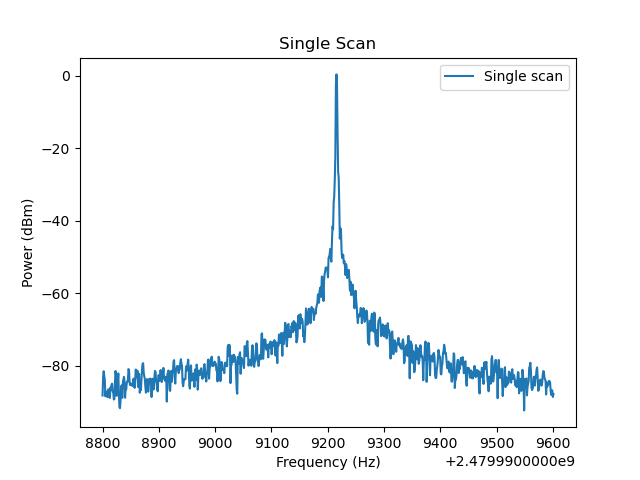

In [50]:
#Single scan
plt.figure()
valonDf.iloc[:, 100].plot(label = 'Single scan')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('Single Scan')

Text(0.5, 1.0, 'All Curves (Valon)')

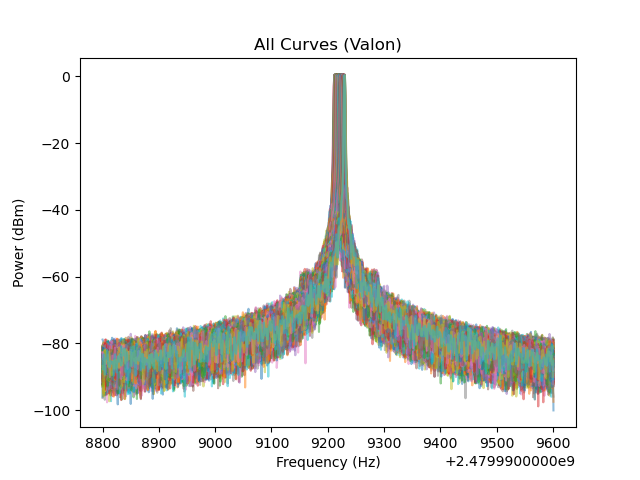

In [51]:
#vomit plot!
valonDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valonDf.plot(legend = False, alpha = .5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('All Curves (Valon)')

Text(0.5, 1.0, 'Log Mean (Valon)')

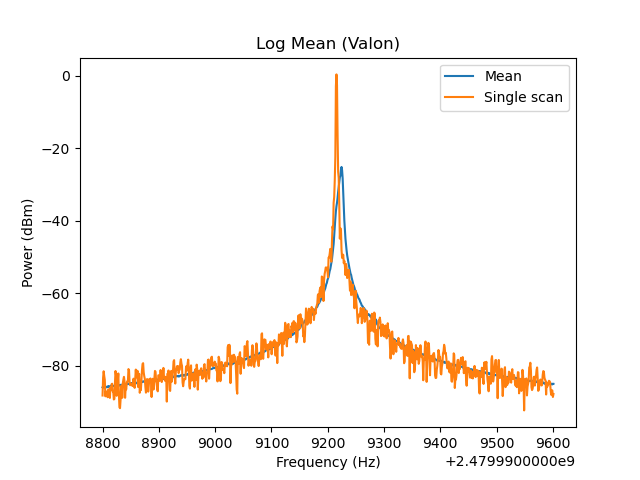

In [52]:
#Log average
plt.figure()
valonDf.mean(axis=1).plot(label = 'Mean')
valonDf.iloc[:, 100].plot(label = 'Single scan')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('Log Mean (Valon)')

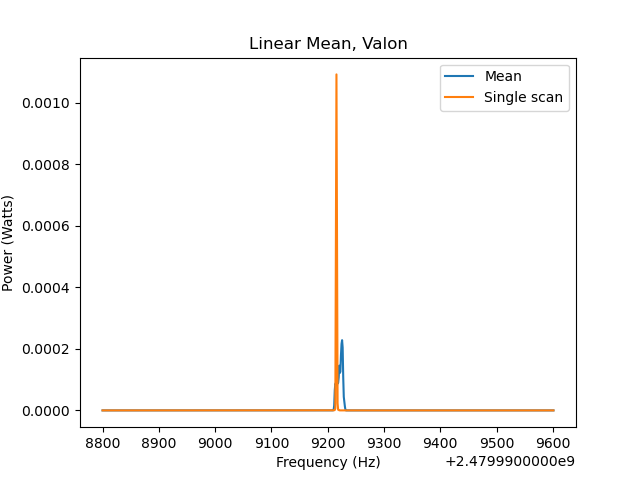

In [53]:
#linear average

def dbm2watts(dBm):
    watts = 10**((dBm - 30)/10)
    return watts

valonLinDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valonLinDf = valonLinDf.apply(dbm2watts)

plt.figure()
valonLinDf.mean(axis=1).plot(label = 'Mean')
valonLinDf.iloc[:, 100].plot(label = 'Single scan')
plt.title('Linear Mean, Valon')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Watts)')
plt.legend()


Text(0, 0.5, 'Power (dBm)')

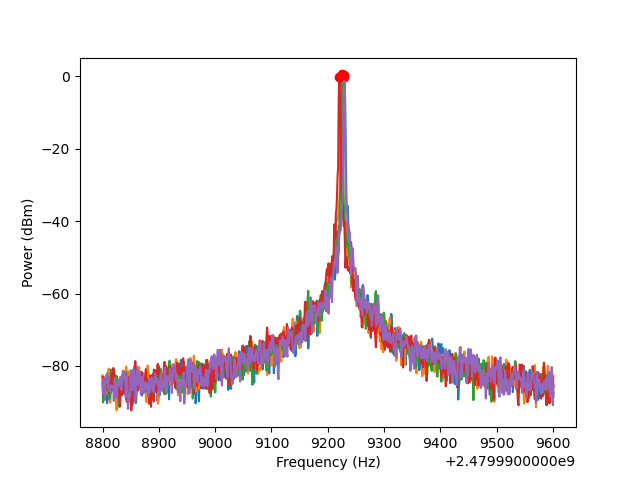

In [54]:
#demo of peak finding

plt.figure()
for scanNum in [0,10,50,300,999]:
    peakIdx =  int(sig.find_peaks(valonDf.iloc[:, scanNum], distance=800)[0])
    peakFreq = valonDf.index[peakIdx]
    valonDf.iloc[:, scanNum].plot(label = 'Single scan')
    plt.plot(peakFreq, valonDf.iloc[peakIdx, scanNum], 'ro')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')


/tmp/ipykernel_213587/1279541766.py:15: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  peakFreqArr[i] = valonDf.index[idx]


Text(0, 0.5, 'Frequency (Hz)')

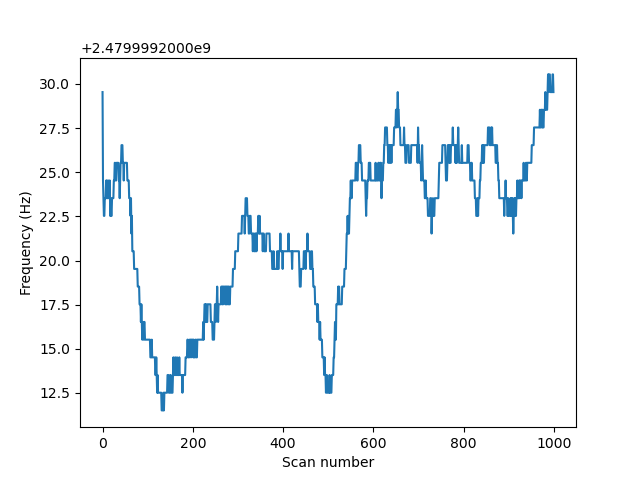

In [23]:
nScans = len(valonDf.iloc[0,:])
peakIdxArr = np.zeros(nScans)
peakFreqArr = np.zeros(nScans)


for scan in range(nScans):
    #Find peak of each scan to create time series of peak wandering
    #find_peaks returns tuple; (single element arr of indicies, empty dict). Take int of single element arr
    # Distance = 800 only gets largest peak.
    peakIdxArr[scan] =  int(sig.find_peaks(valonDf.iloc[:, scan], distance=800)[0])


for i, idx in enumerate(peakIdxArr):
    #convert from idx that scipy find_peaks returns to actual frequency
    peakFreqArr[i] = valonDf.index[idx]


plt.figure()
plt.plot(peakFreqArr)
plt.xlabel('Scan number')
plt.ylabel('Frequency (Hz)')


In [11]:
print('Valon 3 hour stability run:', round(peakFreqArr.mean(),1), '+-', round(peakFreqArr.std(), 1),'Hz')

Valon 3 hour stability run: 2479999221.7 +- 4.6 Hz


Text(0, 0.5, 'Counts')

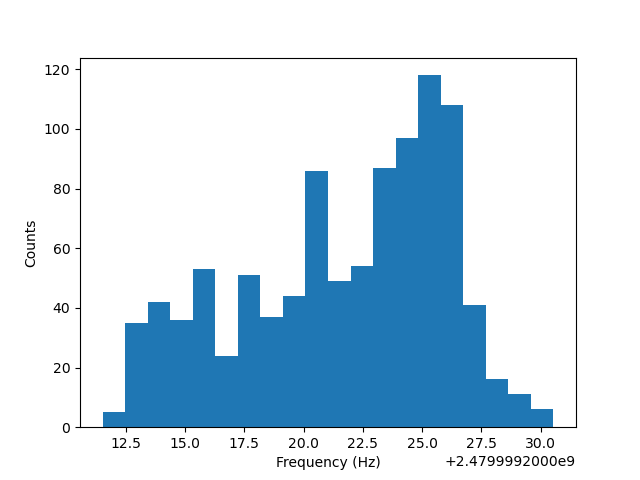

In [22]:
plt.figure()
plt.hist(peakFreqArr, bins =20);
plt.xlabel('Frequency (Hz)')
plt.ylabel('Counts')
plt.title('Valon Peak Frequency Histogram')